# Use Case Description

**Use Case**: Briefly describe your use case here. For example, "Predicting readmission within 30 days for patients in a healthcare facility."

**False Positives vs. False Negatives**: Discuss which of these is more critical for your use case. For instance, "In this scenario, false negatives might be more costly as they represent cases where a patient who needs closer monitoring is not identified."

**Evaluation Metrics**: Mention the metrics you’ll use for evaluation, such as accuracy, precision, recall, F1-score, ROC-AUC, etc., and explain why they are suitable for comparing different models. For example, "Recall is essential as we want to ensure we capture as many true readmissions as possible."

In [5]:
import pandas as pd
data = pd.read_csv('/Users/damandeepsingh/Documents/RRC/Term2[FALL 2024]/COMP-2704 (258751) Supervised Machine Learning/final project/dataset.csv')

print("Missing values in each column:")
print(data.isnull().sum())

print("Number of duplicate rows:", data.duplicated().sum())

data = data.drop_duplicates()

data = data.dropna()

print("Missing values in each column after cleaning:")
print(data.isnull().sum())
print("Number of duplicate rows after cleaning:", data.duplicated().sum())

Missing values in each column:
Sex                                     0
Age                                     0
Length_of_Stay                          0
Transferred_to_Acute_Care               0
Transferred_to_Continuing_Care          0
Discharged_to_Home_with_Support         0
Discharged_to_Home_without_Support      0
Admitted_through_ED                     0
Num_Procedures                          0
Num_Unique_Procedures                   0
Num_Unique_ICD_Codes                    0
Num_Unique_Drugs_Last_2y                0
Num_Prescribed_Days_Last_2y             0
Num_Hospital_Admissions_Last_6m         0
Num_ED_Visits_Last_6m                   0
Num_Non_ED_Visits_Last_6m               0
Total_Length_of_Stay_Last_6m            0
Num_General_Practice_Visits_Last_6m     0
Num_General_Surgery_Visits_Last_6m      0
Num_Internal_Medicine_Visits_Last_6m    0
Charlson_Comorbidity_Index              0
Hypertension                            0
Diabetes                                0
Hea

In [6]:
print("Descriptive statistics of the dataset:")
print(data.describe())

Descriptive statistics of the dataset:
              Sex          Age  Length_of_Stay  Transferred_to_Acute_Care  \
count  1000.00000  1000.000000     1000.000000                1000.000000   
mean      0.51000    52.852000       14.726000                   0.502000   
std       0.50015    20.719348        8.344492                   0.500246   
min       0.00000    18.000000        1.000000                   0.000000   
25%       0.00000    34.750000        8.000000                   0.000000   
50%       1.00000    53.000000       15.000000                   1.000000   
75%       1.00000    71.000000       22.000000                   1.000000   
max       1.00000    89.000000       29.000000                   1.000000   

       Transferred_to_Continuing_Care  Discharged_to_Home_with_Support  \
count                     1000.000000                      1000.000000   
mean                         0.484000                         0.483000   
std                          0.499994        

In [7]:
corr = data.corr()
print("Correlation matrix:")
print(corr)

correlation_with_target = data.corr()["Readmitted_in_30_Days"].sort_values(ascending=False)
print("Correlation with Readmitted_in_30_Days:")
print(correlation_with_target)

Correlation matrix:
                                           Sex       Age  Length_of_Stay  \
Sex                                   1.000000  0.043031       -0.011335   
Age                                   0.043031  1.000000        0.003696   
Length_of_Stay                       -0.011335  0.003696        1.000000   
Transferred_to_Acute_Care             0.015923 -0.000261        0.027948   
Transferred_to_Continuing_Care        0.016652  0.007598       -0.019046   
Discharged_to_Home_with_Support      -0.009327 -0.035514        0.001282   
Discharged_to_Home_without_Support   -0.044586 -0.057962        0.010756   
Admitted_through_ED                  -0.008162 -0.012691       -0.040025   
Num_Procedures                        0.027992 -0.009914       -0.018465   
Num_Unique_Procedures                 0.037194 -0.005550       -0.021228   
Num_Unique_ICD_Codes                  0.015219 -0.044184        0.045800   
Num_Unique_Drugs_Last_2y              0.027579  0.004554       -0.01

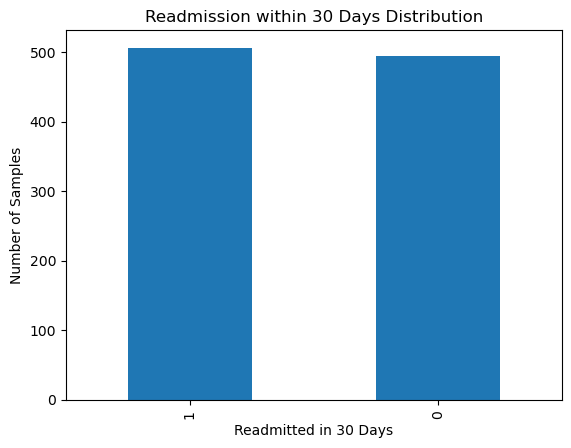

In [8]:
import matplotlib.pyplot as plt

data["Readmitted_in_30_Days"].value_counts().plot(kind="bar")
plt.xlabel("Readmitted in 30 Days")
plt.ylabel("Number of Samples")
plt.title("Readmission within 30 Days Distribution")
plt.show()

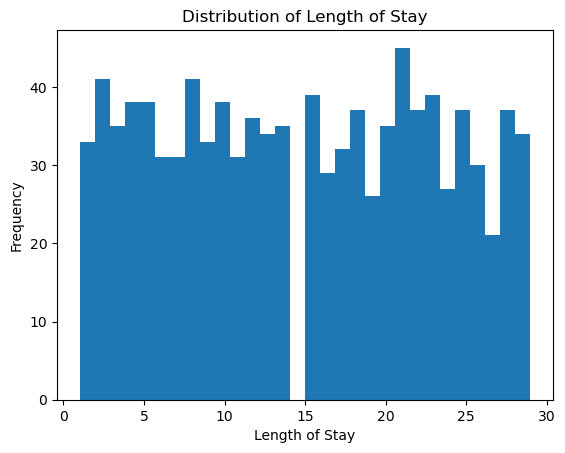

In [9]:
data["Length_of_Stay"].plot(kind="hist", bins=30)
plt.xlabel("Length of Stay")
plt.ylabel("Frequency")
plt.title("Distribution of Length of Stay")
plt.show()

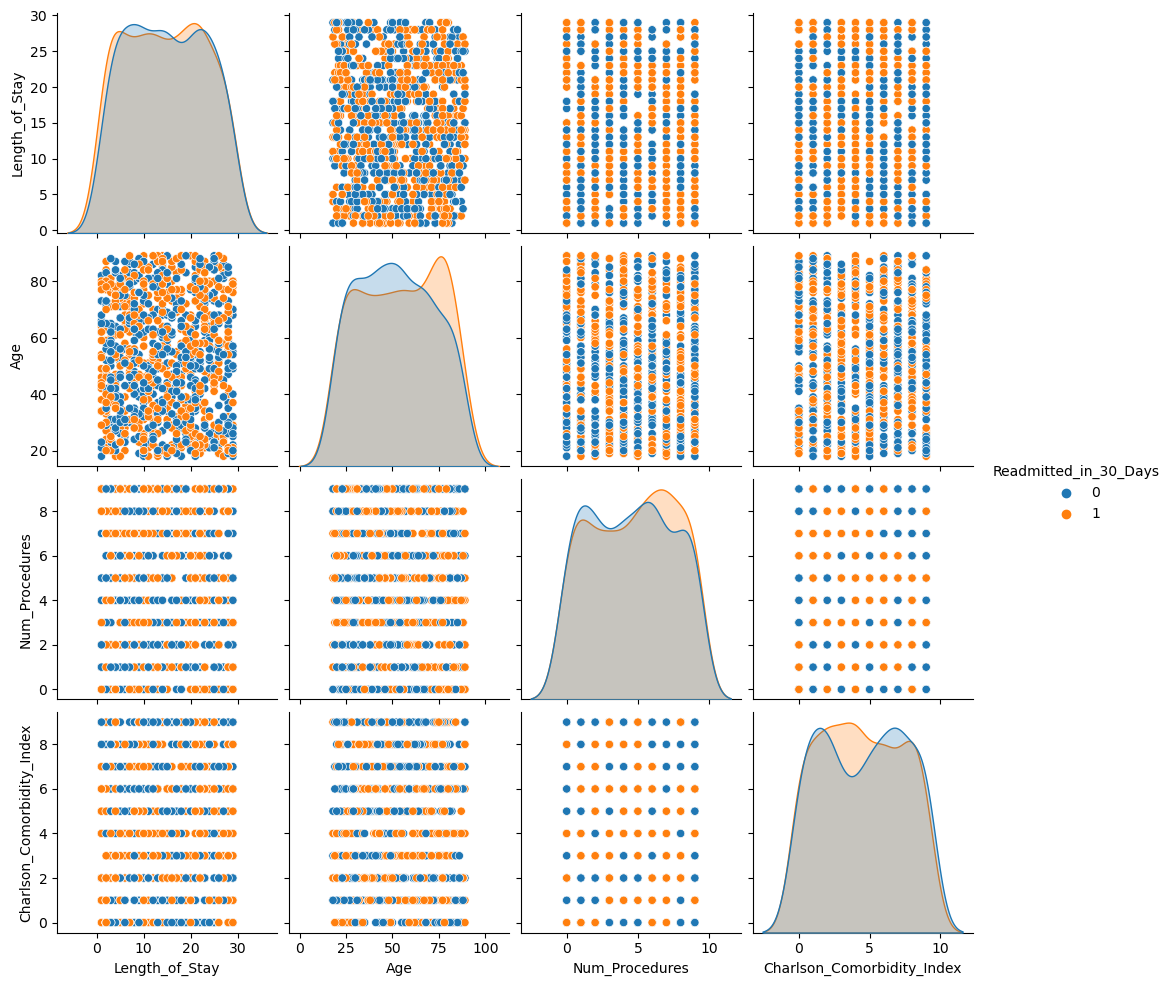

In [10]:
import seaborn as sns

selected_features = ["Length_of_Stay", "Age", "Num_Procedures", "Charlson_Comorbidity_Index", "Readmitted_in_30_Days"]
sns.pairplot(data[selected_features], hue="Readmitted_in_30_Days")
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

X = data.drop("Readmitted_in_30_Days", axis=1)
y = data["Readmitted_in_30_Days"]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Testing set size:", X_test.shape)

Training set size: (600, 25)
Validation set size: (200, 25)
Testing set size: (200, 25)


In [12]:
train_data = pd.concat([X_train, y_train], axis=1)
val_data = pd.concat([X_val, y_val], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

train_data.to_csv("train_data.csv", index=False)
val_data.to_csv("val_data.csv", index=False)
test_data.to_csv("test_data.csv", index=False)

print("Data saved to train_data.csv, val_data.csv, and test_data.csv")

Data saved to train_data.csv, val_data.csv, and test_data.csv


In [13]:
# Train a default decision tree model
default_model = DecisionTreeClassifier(random_state=42)
default_model.fit(X_train, y_train)

# Get the depth of the default decision tree model
default_depth = default_model.get_depth()
print(f"The default depth of the decision tree model is: {default_depth}")

NameError: name 'DecisionTreeClassifier' is not defined